In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import tensorflow as tf
%matplotlib inline
from scipy.stats import pearsonr, spearmanr
from keras.utils import timeseries_dataset_from_array

In [4]:
data = pd.read_csv("data/YF_AAPL.csv")

In [5]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,0.936384,1.004464,0.907924,0.999442,0.844981,535796800
1,2000-01-04,0.966518,0.987723,0.903460,0.915179,0.773741,512377600
2,2000-01-05,0.926339,0.987165,0.919643,0.928571,0.785063,778321600
3,2000-01-06,0.947545,0.955357,0.848214,0.848214,0.717125,767972800
4,2000-01-07,0.861607,0.901786,0.852679,0.888393,0.751094,460734400
...,...,...,...,...,...,...,...
6159,2024-06-27,214.690002,215.740005,212.350006,214.100006,214.100006,49772700
6160,2024-06-28,215.770004,216.070007,210.300003,210.619995,210.619995,82542700
6161,2024-07-01,212.089996,217.509995,211.919998,216.750000,216.750000,60402900
6162,2024-07-02,216.149994,220.380005,215.100006,220.270004,220.270004,58046200


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

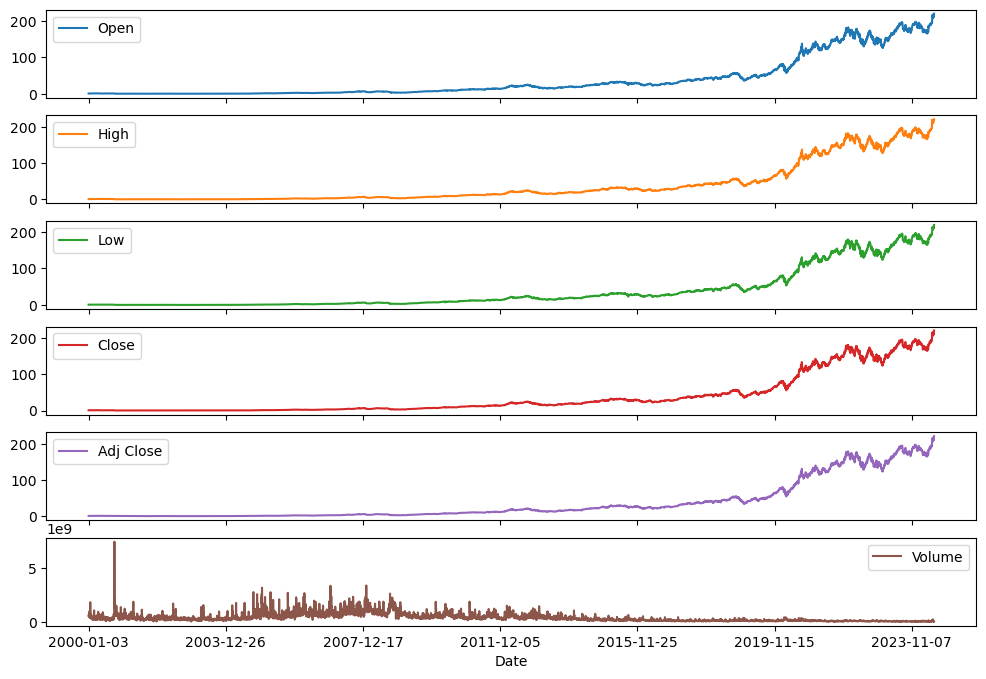

In [8]:
data.plot(subplots=True, figsize=(12, 8), x="Date")

In [9]:
data2 = yf.download("AAPL", start="2000-01-01", end="2024-07-05")

[*********************100%%**********************]  1 of 1 completed


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

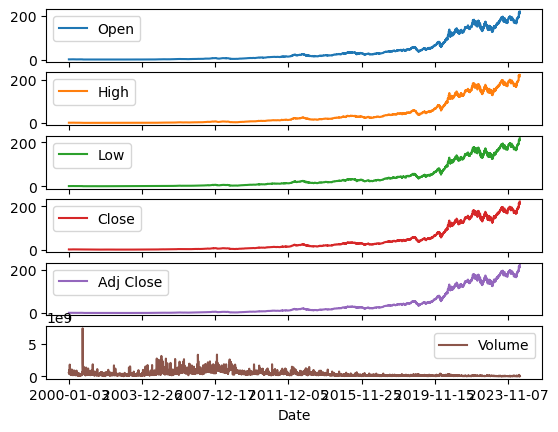

In [10]:
data.plot(subplots=True, x="Date")

In [9]:
data[]

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,0.936384,1.004464,0.907924,0.999442,0.844981,535796800
1,2000-01-04,0.966518,0.987723,0.903460,0.915179,0.773741,512377600
2,2000-01-05,0.926339,0.987165,0.919643,0.928571,0.785063,778321600
3,2000-01-06,0.947545,0.955357,0.848214,0.848214,0.717125,767972800
4,2000-01-07,0.861607,0.901786,0.852679,0.888393,0.751094,460734400
...,...,...,...,...,...,...,...
6159,2024-06-27,214.690002,215.740005,212.350006,214.100006,214.100006,49772700
6160,2024-06-28,215.770004,216.070007,210.300003,210.619995,210.619995,82542700
6161,2024-07-01,212.089996,217.509995,211.919998,216.750000,216.750000,60402900
6162,2024-07-02,216.149994,220.380005,215.100006,220.270004,220.270004,58046200


In [10]:
np.cov(data[["Open", "High", "Low", "Close", "Adj Close", "Volume"]], rowvar=False)

array([[ 2.99995388e+03,  3.03223400e+03,  2.97006367e+03,
         3.00220196e+03,  2.98861848e+03, -9.72631931e+09],
       [ 3.03223400e+03,  3.06527716e+03,  3.00216167e+03,
         3.03496445e+03,  3.02123171e+03, -9.82101831e+09],
       [ 2.97006367e+03,  3.00216167e+03,  2.94089138e+03,
         2.97274807e+03,  2.95932320e+03, -9.64453149e+09],
       [ 3.00220196e+03,  3.03496445e+03,  2.97274807e+03,
         3.00538526e+03,  2.99179698e+03, -9.73751927e+09],
       [ 2.98861848e+03,  3.02123171e+03,  2.95932320e+03,
         2.99179698e+03,  2.97928822e+03, -9.61583003e+09],
       [-9.72631931e+09, -9.82101831e+09, -9.64453149e+09,
        -9.73751927e+09, -9.61583003e+09,  1.47875259e+17]])

In [12]:
x = data["Adj Close"]
ys = data[["Open", "High", "Low", "Close", "Volume"]]

In [13]:
for y_label in ys.columns:
    res = pearsonr(x, data[y_label])
    print(f"Pearson R Result for Adj Close and {y_label}: {res.statistic:.3f} with p-value {res.pvalue:.3f}")

Pearson R Result for Adj Close and Open: 1.000 with p-value 0.000
Pearson R Result for Adj Close and High: 1.000 with p-value 0.000
Pearson R Result for Adj Close and Low: 1.000 with p-value 0.000
Pearson R Result for Adj Close and Close: 1.000 with p-value 0.000
Pearson R Result for Adj Close and Volume: -0.458 with p-value 0.000


In [21]:
res = spearmanr(data[["Open", "High", "Low", "Close", "Adj Close", "Volume"]])
print(f"Spearman R Result: \n{res.statistic} \nwith p-value \n{res.pvalue}\n")

Spearman R Result: 
[[ 1.          0.9999483   0.99994419  0.99988628  0.9998537  -0.67830785]
 [ 0.9999483   1.          0.99993379  0.99994771  0.99991346 -0.67713299]
 [ 0.99994419  0.99993379  1.          0.99994848  0.99992035 -0.67985298]
 [ 0.99988628  0.99994771  0.99994848  1.          0.99996765 -0.67849027]
 [ 0.9998537   0.99991346  0.99992035  0.99996765  1.         -0.67941565]
 [-0.67830785 -0.67713299 -0.67985298 -0.67849027 -0.67941565  1.        ]] 
with p-value 
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]



In [72]:
input_data = data["Adj Close"][:-20]

targets = data["Adj Close"][20:]

dataset = timeseries_dataset_from_array(
    input_data,
    targets,
    sequence_length=20, 
    batch_size=None)

dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.float64, name=None))>

In [ ]:
i = 0
for x, y in dataset:
    print(y)
    print(f"shape of x: {np.shape(x)}")
    print(f"shape of y: {np.shape(y)}\n")
    

tf.Tensor(0.7567554712295532, shape=(), dtype=float64)
shape of x: (20,)
shape of y: ()

tf.Tensor(0.745904266834259, shape=(), dtype=float64)
shape of x: (20,)
shape of y: ()

tf.Tensor(0.7798736095428467, shape=(), dtype=float64)
shape of x: (20,)
shape of y: ()

tf.Tensor(0.8152582049369812, shape=(), dtype=float64)
shape of x: (20,)
shape of y: ()

tf.Tensor(0.8610215187072754, shape=(), dtype=float64)
shape of x: (20,)
shape of y: ()

tf.Tensor(0.8671553134918213, shape=(), dtype=float64)
shape of x: (20,)
shape of y: ()

tf.Tensor(0.8501702547073364, shape=(), dtype=float64)
shape of x: (20,)
shape of y: ()

tf.Tensor(0.8567759990692139, shape=(), dtype=float64)
shape of x: (20,)
shape of y: ()

tf.Tensor(0.8209192752838135, shape=(), dtype=float64)
shape of x: (20,)
shape of y: ()

tf.Tensor(0.8742318153381348, shape=(), dtype=float64)
shape of x: (20,)
shape of y: ()

tf.Tensor(0.898293673992157, shape=(), dtype=float64)
shape of x: (20,)
shape of y: ()

tf.Tensor(0.86149340867

2024-07-09 21:51:41.134334: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
